In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_of_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline


matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode

In [3]:
magnitude_columns = [
                    ('nnmag_grz', '../1_desi-photo-prior/model/nnmag_grz.csv'),
                    ('nnmag_grzw1', '../1_desi-photo-prior/model/nnmag_grzw1.csv'),
                    ('nnmag_grzw1w2', '../1_desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('rel_dered_mag_g', '../1_desi-photo-prior/model/rel_dered_mag_g.csv'),
                    ('rel_dered_mag_r', '../1_desi-photo-prior/model/rel_dered_mag_r.csv'),
                    ('rel_dered_mag_z', '../1_desi-photo-prior/model/rel_dered_mag_z.csv'),
                    ('rel_dered_g_r', '../1_desi-photo-prior/model/rel_dered_g_r.csv'),
                    ('rel_dered_r_z', '../1_desi-photo-prior/model/rel_dered_r_z.csv'),
                    ('rel_dered_g_z', '../1_desi-photo-prior/model/rel_dered_g_z.csv'),
                    # 
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_large_pos_err.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14_large_pos_err.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl') #TODO RETURN TO VAL WITH HOSTLESS
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,766.567078,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,742.421753,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,724.682678,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,729.754639,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9210,9210,b'SRGe J102315.1+561957',155.813071,56.332561,4389.277832,1.637604e-15,NaN
9211,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3578.447510,1.608667e-15,NaN
9212,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3361.667969,1.595806e-15,NaN
9213,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3662.989990,1.532857e-15,NaN


    adding angular separation columns
matching: 145071 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:03<00:00, 2874.68it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grz"


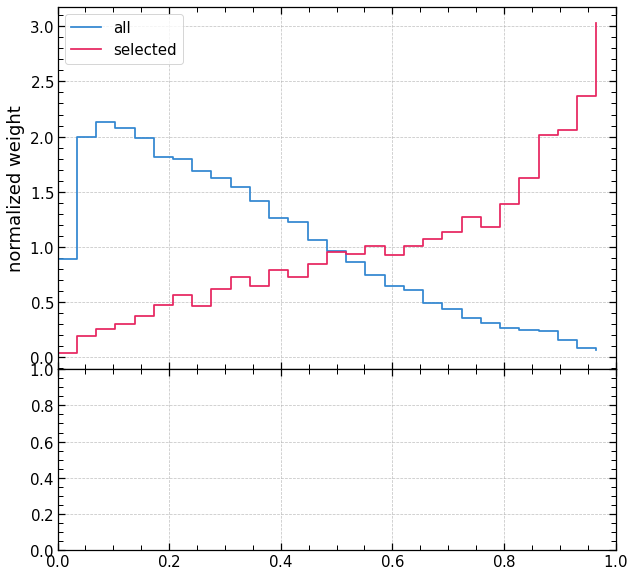

Incorporating bias "DESI:nnmag_grzw1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1"


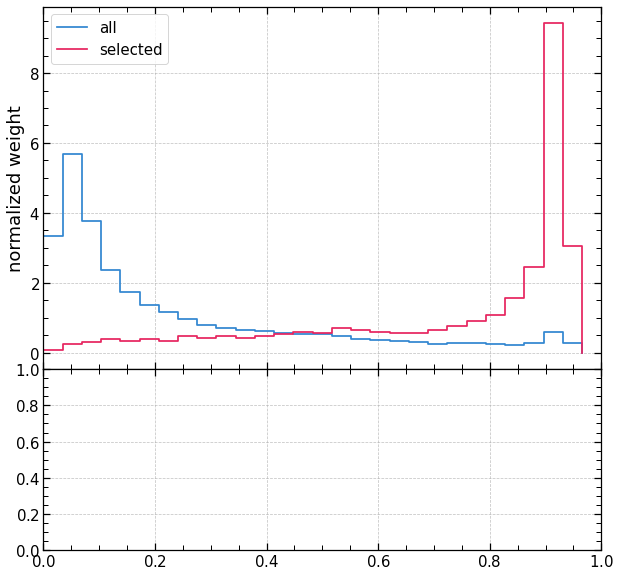

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


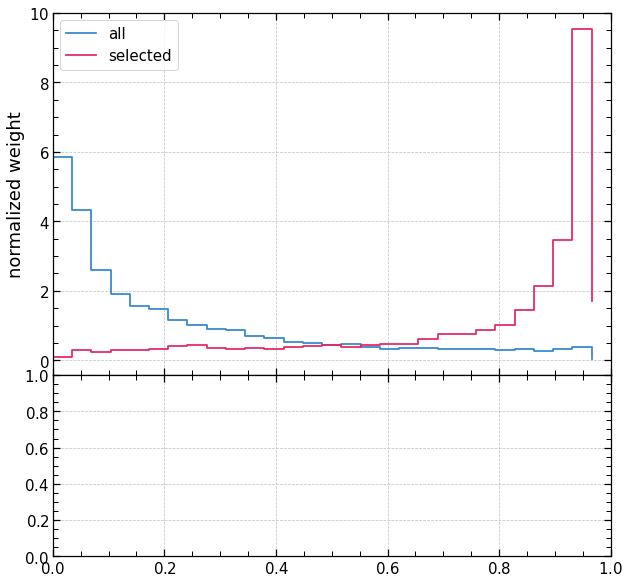

Incorporating bias "DESI:rel_dered_mag_g" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_g"


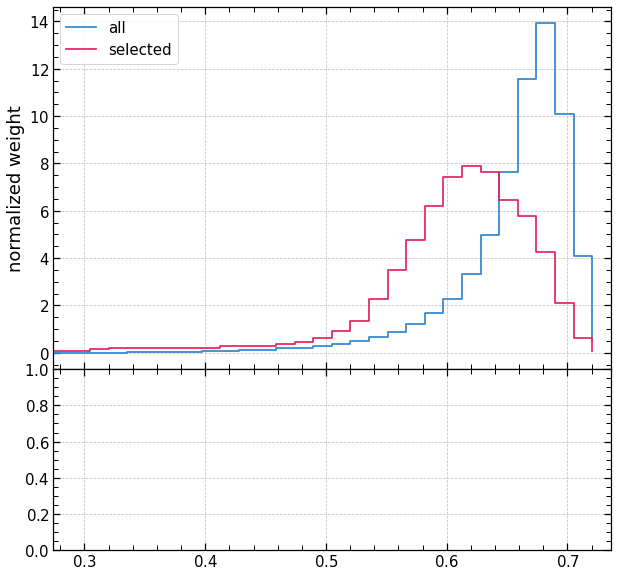

Incorporating bias "DESI:rel_dered_mag_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_r"


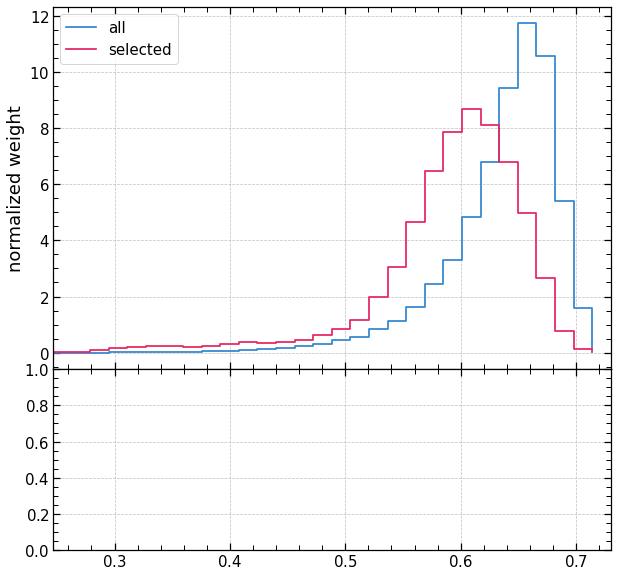

Incorporating bias "DESI:rel_dered_mag_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_z"


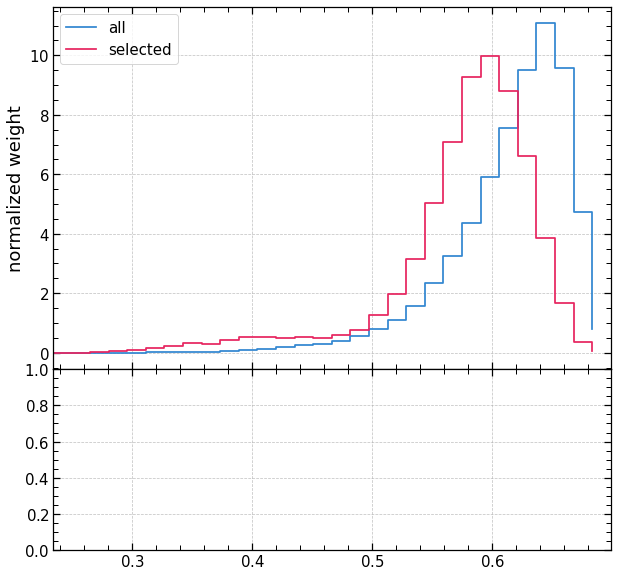

Incorporating bias "DESI:rel_dered_g_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_r"


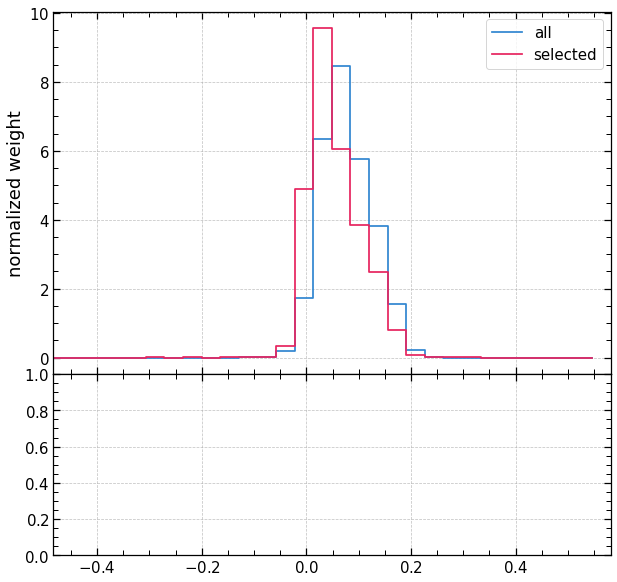

Incorporating bias "DESI:rel_dered_r_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_r_z"


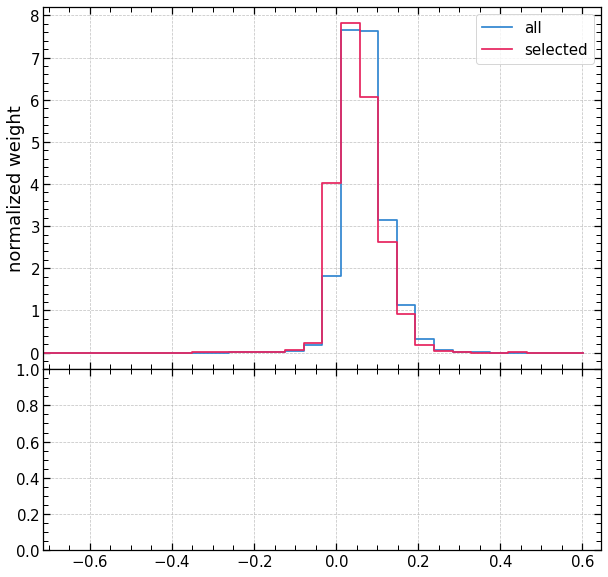

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:rel_dered_g_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_z"


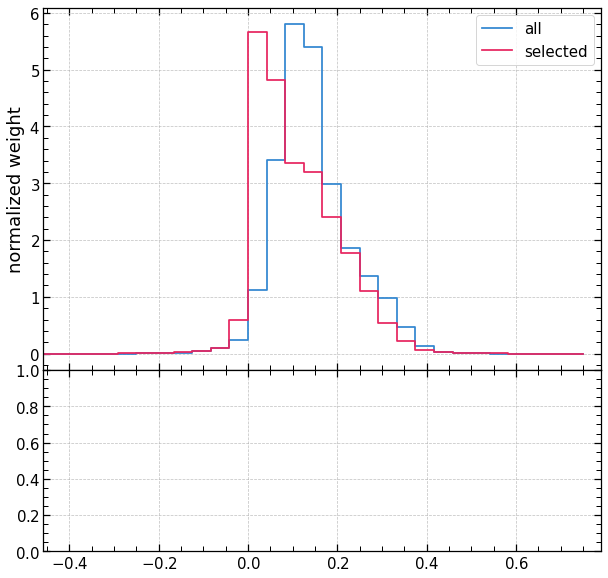


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


In [ ]:
os.system('rm DESI*_fit.txt')

In [ ]:

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)


In [6]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
#nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway_.pkl')

In [7]:
nway_res_ero

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1,bias_DESI_nnmag_grzw1w2,bias_DESI_rel_dered_mag_g,bias_DESI_rel_dered_mag_r,bias_DESI_rel_dered_mag_z,bias_DESI_rel_dered_g_r,bias_DESI_rel_dered_r_z,bias_DESI_rel_dered_g_z,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig,rel_dered_mag_w1_orig_is_missing,rel_dered_mag_w2_orig_is_missing
0,0,10477,0.042512,0.042512,2,5.203578,5.203578,0.000067,1.000000,1.000000,36.203859,1.000000,1.0,1.0,1.0,1.0,1.0,2.413808e-03,1,0.003249,0.742262,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.0,-99.0,-99.0,-99.0,0.407712,0.382073,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.134679,0.273902,0.089736,b'grzw1w2',0.967633,0.967633,-99.000000,0.932976,-99.000000,0.984407,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356,False,False
1,0,116419,14.656303,14.656303,2,5.203490,5.203490,0.000067,6.688953,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,4.467597e-04,0,0.003249,0.137111,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1139',159.429367,57.195864,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'grz',-99.000000,-99.000000,-99.000000,-99.000000,0.856228,0.856228,20.881285,20.552212,20.465680,NaN,NaN,NaN,NaN,0.329073,0.086532,0.415605,NaN,NaN,NaN,NaN,NaN,NaN,False,False
10,0,1016665,27.242085,27.242085,2,5.203275,5.203275,0.000067,1.000000,1.000000,1.423624,1.000000,1.0,1.0,1.0,1.0,1.0,9.507119e-05,0,0.003249,0.029167,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1177',159.433272,57.206322,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.000000,0.437336,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,0.809597,-99.000000,b'grzw1w2',0.588551,0.588551,-99.000000,0.610903,-99.000000,0.273605,23.609695,23.402733,22.965105,19.754969,19.507368,NaN,15.306768,0.206962,0.437628,0.644590,3.210136,3.895365,0.247601,NaN,8.095965,NaN,False,False
4,0,442058,26.626928,26.626928,2,5.203289,5.203289,0.000067,1.000000,1.000000,1.000000,0.846004,1.0,1.0,1.0,1.0,1.0,5.650100e-05,0,0.003249,0.017333,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1090',159.422556,57.195300,0.648383,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,22.693394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
8,0,784835,9.507520,9.507520,2,5.203541,5.203541,0.000067,1.000000,1.000000,0.836162,1.000000,1.0,1.0,1.0,1.0,1.0,5.587617e-05,0,0.003249,0.017142,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1210',159.437965,57.200696,-99.000000,-99.0,-99.0,-99.0,-99.0,0.503986,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.540583,-99.000000,-99.000000,b'grzw1w2',0.480309,0.480309,-99.000000,0.671957,-99.000000,0.498988,23.338484,23.416210,23.045345,21.07

In [8]:
nway_res_ero.prob_has_match.describe()

count    1.358560e+05
mean     1.735469e-04
std      5.174294e-04
min      4.193440e-08
25%      1.771215e-05
50%      4.635047e-05
75%      1.596222e-04
max      2.721379e-02
Name: prob_has_match, dtype: float64

In [9]:
ero_data = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_orig.pkl')
ero_data.srcname_fin = ero_data.srcname_fin.str.encode('utf-8')
ero_data.rename(columns={'srcname_fin':'ID'}, inplace=True)
nway_res_ero_new = nway_res_ero.copy().merge(ero_data, on='ID', how='left')

nway_res_ero_new

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1,bias_DESI_nnmag_grzw1w2,bias_DESI_rel_dered_mag_g,bias_DESI_rel_dered_mag_r,bias_DESI_rel_dered_mag_z,bias_DESI_rel_dered_g_r,bias_DESI_rel_dered_r_z,bias_DESI_rel_dered_g_z,p_single,match_flag,prob_has_match,prob_this_match,ID,RA_x,DEC_x,pos_err,ML_FLUX_0_x,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig,rel_dered_mag_w1_orig_is_missing,rel_dered_mag_w2_orig_is_missing,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0_y,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA_y,DEC_y,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
0,0,10477,0.042512,0.042512,2,5.203578,5.203578,0.000067,1.000000,1.000000,36.203859,1.000000,1.0,1.0,1.0,1.0,1.0,2.413808e-03,1,0.003249,0.742262,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.0,-99.0,-99.0,-99.0,0.407712,0.382073,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.134679,0.273902,0.089736,b'grzw1w2',0.967633,0.967633,-99.000000,0.932976,-99.000000,0.984407,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356,False,False,159.434594,57.198788,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.0,0.0,0.0,1,1,159.436603,57.197499,0.31853,6.785297,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.8307,BLLac,6.040664,4,1,1,1,12.218000,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.31853,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5.451755e+19
1,0,116419,14.656303,14.656303,2,5.203490,5.203490,0.000067,6.688953,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,4.467597e-04,0,0.003249,0.137111,b'SRGe J103744.3+571156',159.434594,57.198788,729.711365,3.284168e-12,NaN,b'9011_609162_1139',159.429367,57.195864,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'grz',-99.000000,-99.000000,-99.000000,-99.000000,0.856228,0.856228,20.881285,20.552212,20.465680,NaN,NaN,NaN,NaN,0.329073,0.086532,0.415605,NaN,NaN,NaN,NaN,NaN,NaN,False,False,159.434594,57.198788,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.0,0.0,0.0,1,1,159.436603,57.197499,0.31853,6.785297,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.8307,BLLac,6.040664,4,1,1,1,12.218000,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.31853,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5

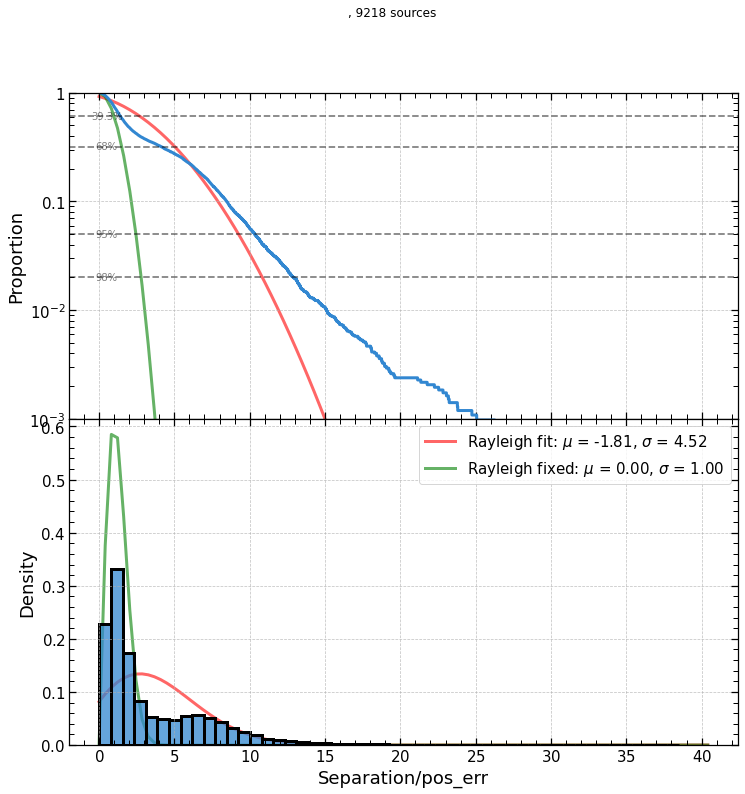

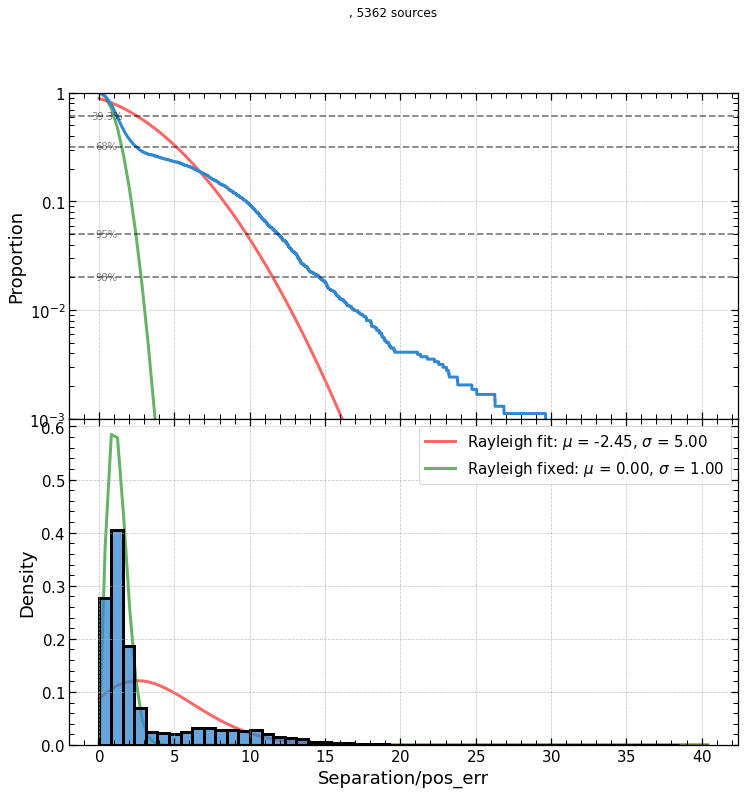

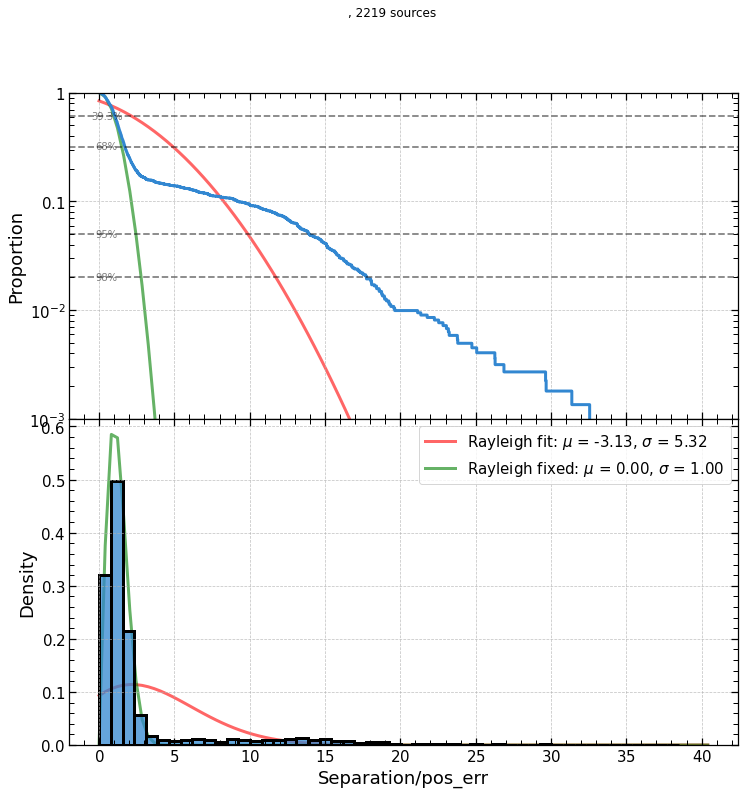

In [14]:
from scripts.cross_match_scripts import rayleigh_plot
rayleigh_plot(nway_res_ero_new.query("match_flag==1"), sep_col='Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='')
rayleigh_plot(nway_res_ero_new.query("match_flag==1 & DET_LIKE_0>15"), sep_col='Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='')
rayleigh_plot(nway_res_ero_new.query("match_flag==1 & DET_LIKE_0>50"), sep_col='Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='')
